In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like # path fo is_list_like has been changed
from pandas_datareader import data
import numpy as np

In [2]:
from yahoofinancials import YahooFinancials
import pandas as pd

# Select Tickers and stock history dates
ticker = 'AAPL'
ticker2 = 'MSFT'
ticker3 = 'INTC'
index = '^NDX'
freq = 'daily' # 'daily', 'weekly', or 'monthly'
start_date = '2012-10-01'
end_date = '2017-10-01'


# Function to clean data extracts
def clean_stock_data(stock_data_list):
    new_list = []
    for rec in stock_data_list:
        if 'type' not in rec.keys():
            new_list.append(rec)
    return new_list

In [3]:
aapl_financials = YahooFinancials(ticker)
mfst_financials = YahooFinancials(ticker2)
intl_financials = YahooFinancials(ticker3)
index_financials = YahooFinancials(index)

# Clean returned stock history data and remove dividend events from price history
daily_aapl_data = clean_stock_data(aapl_financials
                                     .get_historical_stock_data(start_date, end_date, freq)[ticker]['prices'])
daily_msft_data = clean_stock_data(mfst_financials
                                     .get_historical_stock_data(start_date, end_date, freq)[ticker2]['prices'])
daily_intl_data = clean_stock_data(intl_financials
                                     .get_historical_stock_data(start_date, end_date, freq)[ticker3]['prices'])
daily_index_data = index_financials.get_historical_stock_data(start_date, end_date, freq)[index]['prices']
stock_hist_data_list = [{'NDX': daily_index_data}, {'AAPL': daily_aapl_data}, {'MSFT': daily_msft_data},
                        {'INTL': daily_intl_data}]


In [4]:
AAPL = pd.DataFrame(daily_aapl_data)
AAPL.sort_values('date', ascending =True, inplace=True)

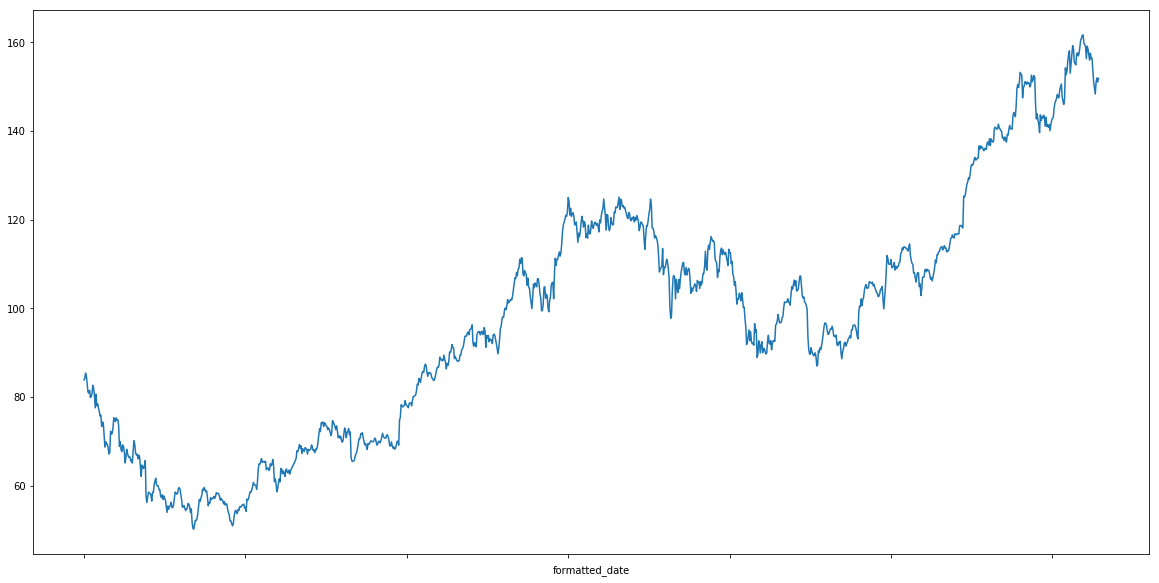

In [5]:
AAPL1 = AAPL.set_index('formatted_date')['adjclose'].plot(figsize=(20,10))
plt.show()

In [6]:
AAPL

,adjclose,close,date,formatted_date,high,low,open,volume
1257,83.842476,94.198570,1349098200,2012-10-01,96.678574,93.785713,95.879997,135898700
1256,84.086601,94.472855,1349184600,2012-10-02,95.192856,92.949997,94.544289,156998100
1255,85.375900,95.921425,1349271000,2012-10-03,95.980003,94.661430,94.980003,106070300
1254,84.784653,95.257141,1349357400,2012-10-04,96.321426,95.078575,95.892860,92681400
1253,82.977821,93.227142,1349443800,2012-10-05,95.142860,93.040001,95.028572,148501500
1252,81.144318,91.167145,1349703000,2012-10-08,92.508568,90.872856,92.411430,159498500
1251,80.849312,90.835716,1349789400,2012-10-09,91.498573,89.078575,91.235718,209649300
1250,81.492706,91.558571,1349875800,2012-10-10,92.139999,91.000000,91.391426,127589000
1249,79.863892,89.728569,1349962200,2012-10-11,92.457146,89.728569,92.357140,136520300
1248,80.068604,89.958572,1350048600,2012-10-12,90.768570,89.328575,89.937141,115003700


In [6]:
# open, high, low, close?? (keep close, because of p.6 fig.)
AAPL2 = np.array(AAPL[['close', 'high', 'low']])

# normalise by closing price
AAPL_n = AAPL2[1:,:]/AAPL2[:-1,:]

def close_high_low(df):
    return np.array(df[['close', 'high', 'low']])

def normalise_price(nparray):
    return nparray[1:,:]/nparray[:-1,:]


In [7]:
data_in = [daily_aapl_data, daily_msft_data ,daily_intl_data, daily_index_data]
data_out = []

for data in data_in:
    temp = pd.DataFrame(data)
    temp.sort_values('date', ascending =True, inplace=True)
    temp = close_high_low(temp)
    temp = normalise_price(temp)
    data_out.append(temp)

In [61]:
a = np.stack(data_out)
b = np.swapaxes(a, 0,2)
b.shape # highlowclose, time, asset

(3, 1257, 4)

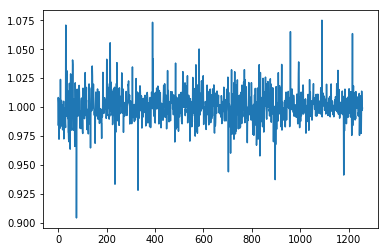

In [60]:
plt.plot(b[1,:,0])
plt.show()

In [8]:
tech_stocks = ['AAPL', 'MSFT', 'INTC']
yahoo_financials_tech = YahooFinancials(tech_stocks)

In [13]:
tech_stock_price_data = yahoo_financials_tech.get_stock_price_data()

UnknownTimeZoneError: 'US/Eastern'